In [20]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
# from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [21]:
mode = ChatOllama(model="llama3")
# mode = ChatGoogleGenerativeAI(model="models/gemini-flash-latest")

In [22]:
class LLMState(TypedDict):
    question: str
    answer: str

In [23]:
def llm_qa(state: LLMState):
    # extract the question from state
    question = state["question"]
    # form a prompt
    prompt = f"Answer the following question {question}"

    #ask that question to the llm
    answer = mode.invoke(prompt).content

    # Update the answer in the state
    state["answer"] = answer

    return state



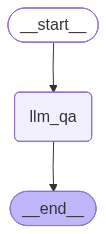

In [24]:
# create our graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node('llm_qa', llm_qa)

# add edges

graph.add_edge(START, "llm_qa")
graph.add_edge("llm_qa", END)

# compile
workflow = graph.compile()
workflow

In [12]:
inital_state = {'question': 'How far is moon from the earth ?'}

workflow.invoke(inital_state)

{'question': 'How far is moon from the earth ?',
 'answer': "The average distance from the Earth to the Moon is **384,400 kilometers (238,900 miles)**.\n\nHowever, the Moon's orbit is elliptical, so the actual distance constantly changes:\n\n*   **Perigee** (closest point): approximately **363,300 km (225,700 miles)**\n*   **Apogee** (farthest point): approximately **405,500 km (252,000 miles)**"}

In [25]:
inital_state = {'question': 'How far is moon from the earth ?'}

workflow.invoke(inital_state)

{'question': 'How far is moon from the earth ?',
 'answer': 'The average distance from the Earth to the Moon is about 384,400 kilometers (238,900 miles). This is called the "lunar distance" or "lunar mean distance." However, the Moon\'s orbit is not a perfect circle and its distance from Earth varies slightly due to the elliptical shape of its orbit.\n\nAt its closest point, called "perigee," the Moon is about 356,400 kilometers (221,500 miles) away from Earth. At its farthest point, or "apogee," it\'s about 405,500 kilometers (252,000 miles) away.\n\nSo, to summarize:\n\n* Average distance: 384,400 km (238,900 miles)\n* Perigee (closest): 356,400 km (221,500 miles)\n* Apogee (farthest): 405,500 km (252,000 miles)\n\nI hope that helps!'}